In [1]:
import random
import math
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model
import numpy as np

In [2]:
def read_rpq_data(filepath):
    tasks = []
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 3:
                r, p, q = map(int, parts)
                tasks.append((r, p, q))
    return tasks

def calculate_makespan(sequence, tasks):
    time = 0
    end_time = 0
    for task in sequence:
        r, p, q = tasks[task]
        time = max(time, r) + p 
        end_time = max(end_time, time + q) 
    return end_time


def generate_neighbor(sequence, N):
    i = random.randint(0, N-1)
    j = random.randint(0, N-1)
    while i == j:
        j = random.randint(0, N-1)
    sequence[i], sequence[j] = sequence[j], sequence[i]
    return sequence

def simulated_annealing_rpq(tasks, initial_temperature, cooling_rate, num_trials, max_epochs):
    N = len(tasks)
    X = list(range(N))
    random.shuffle(X)
    T = initial_temperature
    best_solution = X[:]
    best_makespan = calculate_makespan(best_solution, tasks)

    temperatures = []
    makespans = []

    for epoch in range(max_epochs):
        for _ in range(num_trials):
            X_prime = generate_neighbor(X[:], N)
            delta_f = calculate_makespan(X_prime, tasks) - calculate_makespan(X, tasks)

            if delta_f < 0:
                X = X_prime
                if calculate_makespan(X, tasks) < best_makespan:
                    best_solution = X[:]
                    best_makespan = calculate_makespan(X, tasks)
            else:
                p = math.exp(-delta_f / T)
                if random.random() < p:
                    X = X_prime

        temperatures.append(T)
        makespans.append(calculate_makespan(X, tasks))

        T *= cooling_rate

    return best_solution, best_makespan, temperatures, makespans


def solve_rqp(tasks):
    model = cp_model.CpModel()
    
    starts = [model.NewIntVar(0, sum(task[1] for task in tasks), f'start_{i}') for i in range(len(tasks))]
    ends = [model.NewIntVar(0, sum(task[1] for task in tasks) + max(task[2] for task in tasks), f'end_{i}') for i in range(len(tasks))]
    
    makespan = model.NewIntVar(0, sum(task[1] for task in tasks) + max(task[2] for task in tasks), 'makespan')
    
    for i, (r, p, q) in enumerate(tasks):
        model.Add(starts[i] >= r)
        model.Add(ends[i] == starts[i] + p)
        model.Add(ends[i] + q <= makespan)
    
    model.Minimize(makespan)
    
    solver = cp_model.CpSolver()
    status = solver.Solve(model)
    
    if status == cp_model.OPTIMAL:
        print(f'Optimal Makespan: {solver.Value(makespan)}')
    else:
        print("No solution found!")



In [3]:
temperatura_poczatkowa = 10000
wspolczynnik_chlodzenia = 0.95
liczba_prob = 1
max_epoki = 100000

filepath = "rpq_500.txt"
tasks = read_rpq_data(filepath)

najlepsze_rozwiazanie, najlepszy_makespan, temperatures, makespans = simulated_annealing_rpq(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki)

Najlepsze rozwiązanie: [434, 400, 435, 27, 183, 344, 408, 407, 150, 124, 480, 478, 305, 396, 198, 398, 223, 2, 89, 391, 261, 195, 206, 424, 237, 418, 297, 207, 243, 190, 432, 187, 380, 494, 247, 99, 339, 431, 361, 23, 153, 201, 496, 362, 327, 465, 239, 189, 180, 146, 31, 132, 96, 441, 448, 119, 288, 24, 70, 458, 53, 290, 464, 40, 246, 469, 188, 451, 269, 485, 313, 401, 197, 320, 347, 129, 455, 217, 278, 0, 175, 437, 204, 417, 366, 306, 202, 218, 11, 259, 301, 219, 491, 378, 317, 427, 363, 221, 71, 82, 48, 450, 98, 136, 495, 322, 236, 447, 44, 253, 421, 369, 135, 209, 54, 462, 49, 147, 392, 228, 157, 15, 231, 234, 255, 463, 360, 241, 433, 42, 383, 57, 371, 154, 482, 102, 191, 422, 200, 56, 461, 110, 293, 459, 268, 168, 493, 295, 444, 436, 214, 439, 323, 79, 143, 475, 332, 419, 127, 312, 169, 13, 73, 395, 12, 342, 117, 337, 25, 60, 489, 353, 164, 84, 162, 41, 158, 66, 47, 359, 43, 273, 142, 367, 467, 9, 156, 280, 240, 446, 466, 67, 334, 222, 224, 402, 185, 28, 452, 83, 309, 95, 487, 420,

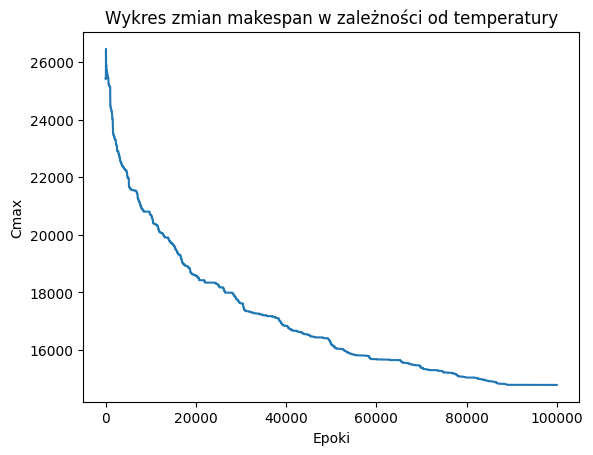

In [4]:
print("Najlepsze rozwiązanie:", najlepsze_rozwiazanie)
print("Najlepszy makespan:", najlepszy_makespan)

if set(najlepsze_rozwiazanie) == set(range(len(tasks))):
    print("Wszystkie zadania zostaly uzyte")
else:
    print("Niektorych zadan brakuje")

solve_rqp(tasks)

epoki = range(max_epoki)
plt.plot(epoki, makespans)
plt.xlabel('Epoki')
plt.ylabel('Cmax')
plt.title('Wykres zmian makespan w zależności od temperatury')
plt.show()

Najlepszy makespan dla 50000 epok: 16684
Najlepszy makespan dla 80000 epok: 14794
Najlepszy makespan dla 100000 epok: 14785


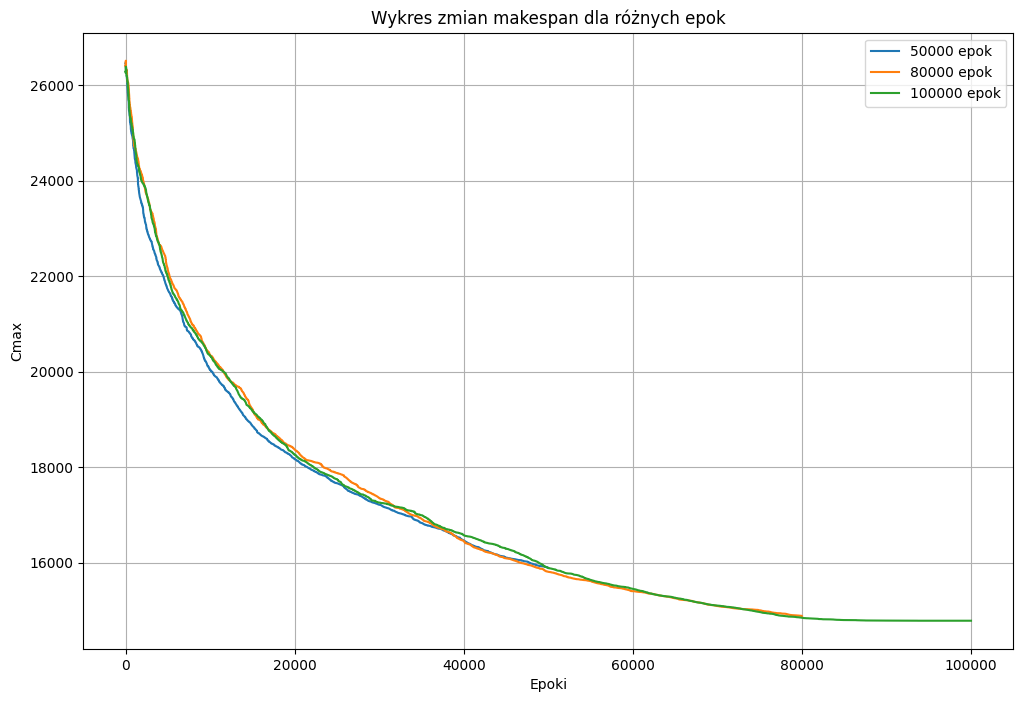

In [5]:
temperatura_poczatkowa = 10000
wspolczynnik_chlodzenia = 0.95
liczba_prob = 1
max_epoki_values = [50000, 80000, 100000]

plt.figure(figsize=(12, 8))

for max_epoki in max_epoki_values:
    makespans_list = []
    for _ in range(10):
        _, najlepszy_makespan, temperatures, makespans = simulated_annealing_rpq(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki)
        makespans_list.append(makespans)
    averaged_makespans = np.mean(makespans_list, axis=0)
    epoki = range(max_epoki)
    
    plt.plot(epoki, averaged_makespans, label=f'{max_epoki} epok')
    print(f'Najlepszy makespan dla {max_epoki} epok: {najlepszy_makespan}')


plt.xlabel('Epoki')
plt.ylabel('Cmax')
plt.title('Wykres zmian makespan dla różnych epok')
plt.legend()
plt.grid(True)
plt.show()

Najlepszy makespan dla temperatury początkowej 2000: 17608
Najlepszy makespan dla temperatury początkowej 1000: 17717
Najlepszy makespan dla temperatury początkowej 500: 17099


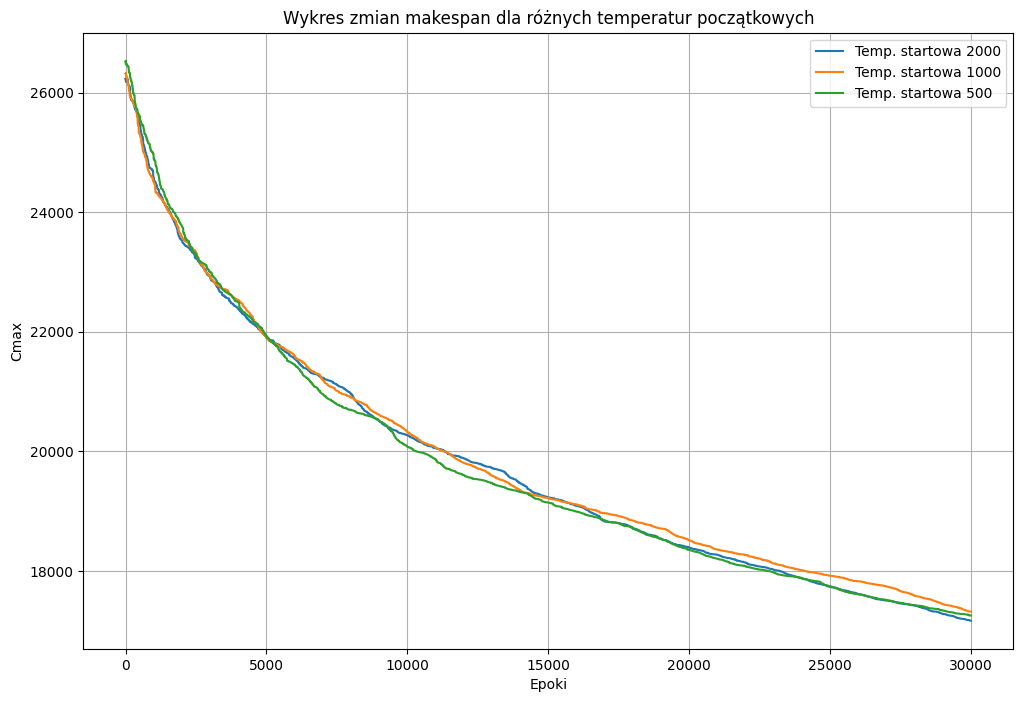

In [6]:
wspolczynnik_chlodzenia = 0.95
liczba_prob = 1
max_epoki = 30000
temperatury_poczatkowe = [2000, 1000, 500]

plt.figure(figsize=(12, 8))

for temperatura_poczatkowa in temperatury_poczatkowe:
    makespans_list = []
    for _ in range(10):
        _, najlepszy_makespan, temperatures, makespans = simulated_annealing_rpq(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki)
        makespans_list.append(makespans)
    averaged_makespans = np.mean(makespans_list, axis=0)
    epoki = range(max_epoki)
    
    plt.plot(epoki, averaged_makespans, label=f'Temp. startowa {temperatura_poczatkowa}')
    print(f'Najlepszy makespan dla temperatury początkowej {temperatura_poczatkowa}: {najlepszy_makespan}')

plt.xlabel('Epoki')
plt.ylabel('Cmax')
plt.title('Wykres zmian makespan dla różnych temperatur początkowych')
plt.legend()
plt.grid(True)
plt.show()

Najlepszy makespan dla współczynnika chłodzenia 0.95: [26610.4 26606.7 26601.2 ... 15946.4 15946.4 15946.4]
Najlepszy makespan dla współczynnika chłodzenia 0.6: [26315.2 26315.2 26314.7 ... 15887.4 15887.3 15887.3]
Najlepszy makespan dla współczynnika chłodzenia 0.51: [26024.8 26022.4 26058.6 ... 16100.3 16100.3 16100.3]


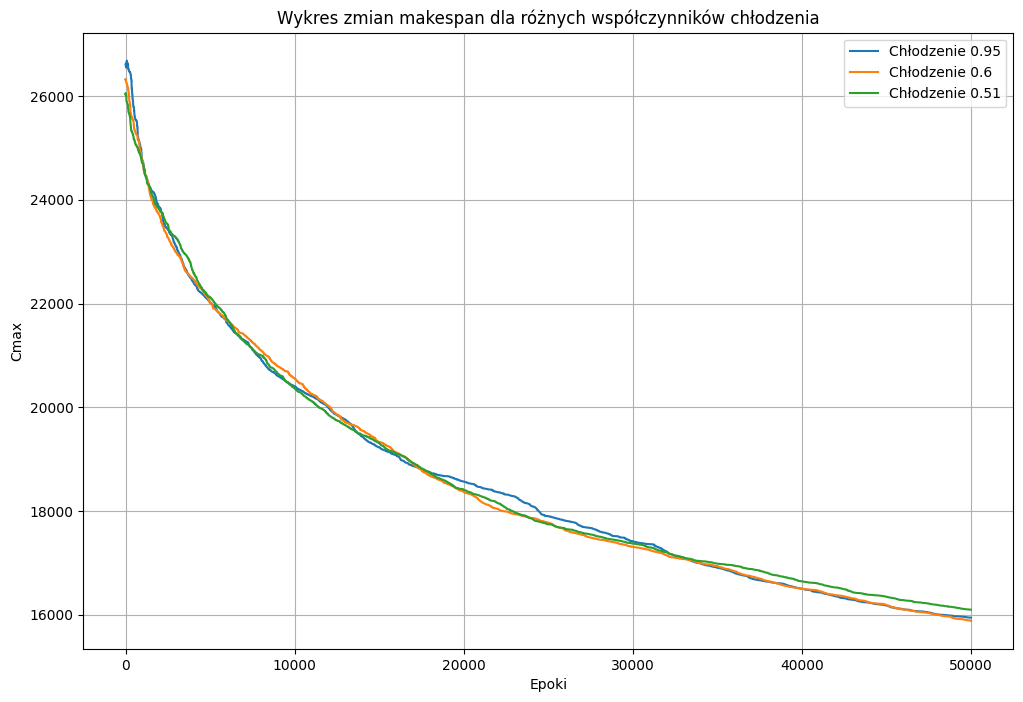

In [8]:
temperatura_poczatkowa = 10000
liczba_prob = 1
max_epoki = 50000
wspolczynniki_chlodzenia = [0.95, 0.6, 0.51]

plt.figure(figsize=(12, 8))

for wspolczynnik_chlodzenia in wspolczynniki_chlodzenia:
    makespans_list = []
    for _ in range(10):
        _, najlepszy_makespan, temperatures, makespans = simulated_annealing_rpq(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki)
        makespans_list.append(makespans)
    averaged_makespans = np.mean(makespans_list, axis=0)
    epoki = range(max_epoki)
    
    plt.plot(epoki, averaged_makespans, label=f'Chłodzenie {wspolczynnik_chlodzenia}')
    print(f'Najlepszy makespan dla współczynnika chłodzenia {wspolczynnik_chlodzenia}: {averaged_makespans}')

plt.xlabel('Epoki')
plt.ylabel('Cmax')
plt.title('Wykres zmian makespan dla różnych współczynników chłodzenia')
plt.legend()
plt.grid(True)
plt.show()

Najlepszy makespan dla 1 liczby prób: 20008
Najlepszy makespan dla 5 liczby prób: 16042
Najlepszy makespan dla 10 liczby prób: 14785


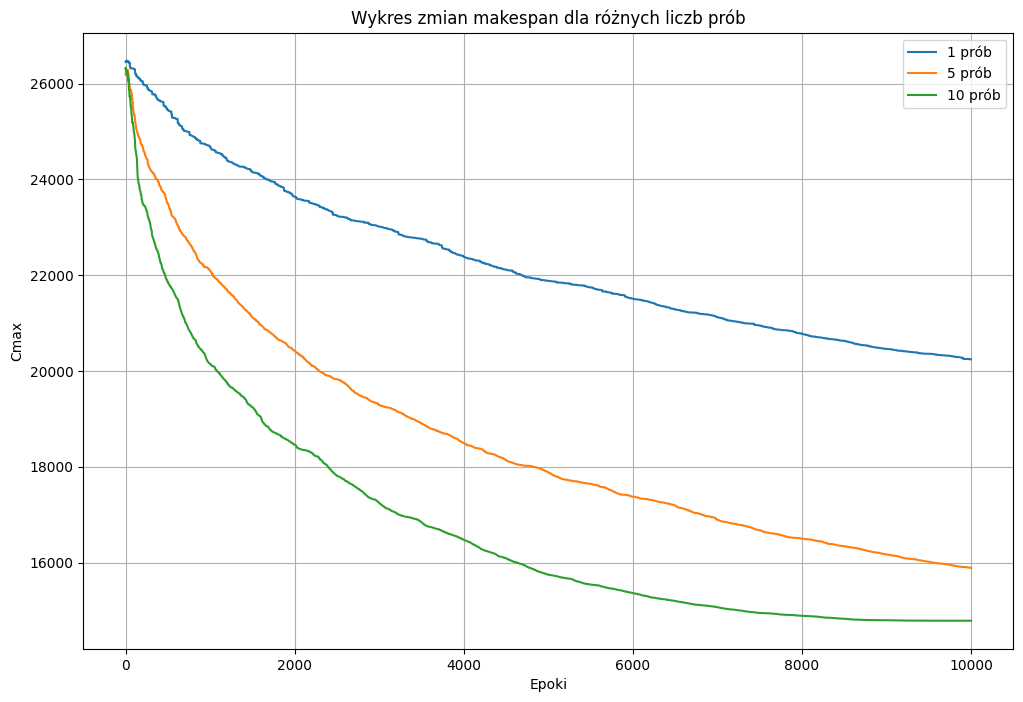

In [7]:
temperatura_poczatkowa = 1000
wspolczynnik_chlodzenia = 0.95
max_epoki = 10000
liczby_prob = [1, 5, 10]

plt.figure(figsize=(12, 8))

for liczba_prob in liczby_prob:
    makespans_list = []
    for _ in range(10):
        _, najlepszy_makespan, temperatures, makespans = simulated_annealing_rpq(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki)
        makespans_list.append(makespans)
    averaged_makespans = np.mean(makespans_list, axis=0)
    epoki = range(max_epoki)
    
    plt.plot(epoki, averaged_makespans, label=f'{liczba_prob} prób')
    print(f'Najlepszy makespan dla {liczba_prob} liczby prób: {najlepszy_makespan}')

plt.xlabel('Epoki')
plt.ylabel('Cmax')
plt.title('Wykres zmian makespan dla różnych liczb prób')
plt.legend()
plt.grid(True)
plt.show()